In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [9]:
data = pd.read_csv('/content/drive/MyDrive/data_2d.csv')

In [17]:
data = pd.DataFrame(data)

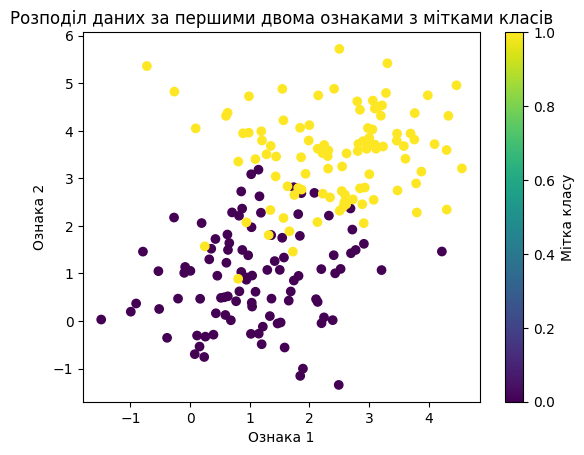

In [31]:
plt.scatter(data.iloc[:,1 ], data.iloc[:, 2], c=data.iloc[:, 0])
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Розподіл даних за першими двома ознаками з мітками класів')
plt.colorbar(label='Мітка класу')
plt.show()

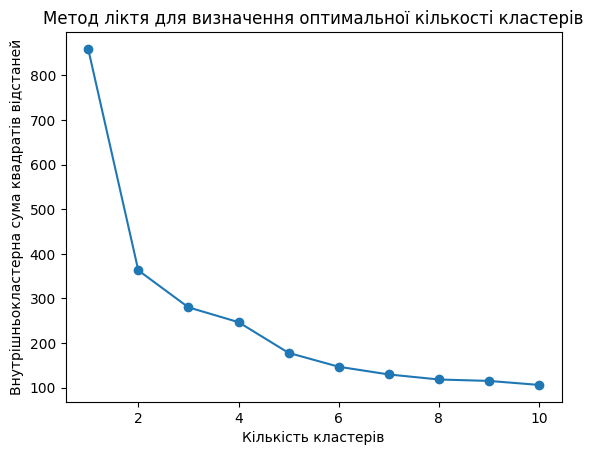

In [27]:
# Вибір діапазону кількості кластерів для перевірки
k_range = range(1, 11)
# Пустий список для збереження значень внутрішньокластерної суми квадратів відстаней
sse = []

# Перевірка для кожної кількості кластерів в діапазоні
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Побудова графіку методу ліктя
plt.plot(k_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерна сума квадратів відстаней')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

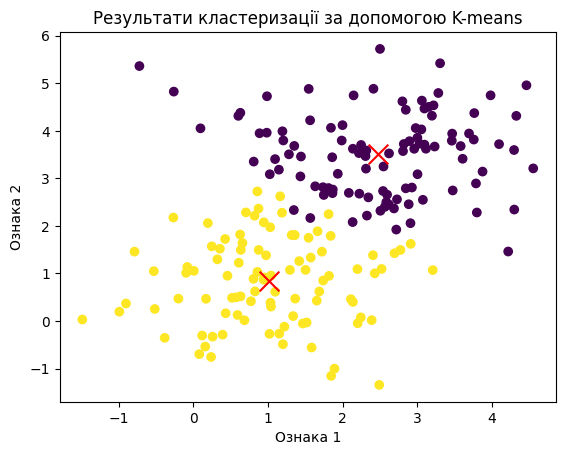

In [34]:
# Вибираємо оптимальну кількість кластерів 2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k,n_init="auto")
kmeans.fit(data)
labels = kmeans.labels_

# Визначаємо центри кластерів
centers = kmeans.cluster_centers_


plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='x', s=200)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Результати кластеризації за допомогою K-means')
plt.show()

In [5]:
mnist = pd.read_csv('/content/drive/MyDrive/mnist.csv')

In [6]:
mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.decomposition import PCA

# Створення екземпляру PCA з бажаною кількістю компонент (2 в даному випадку)
pca = PCA(n_components=2)

# Зменшення розмірності даних до 2D
mnist_2d = pca.fit_transform(mnist)
mnist_2d = pd.DataFrame(mnist_2d)

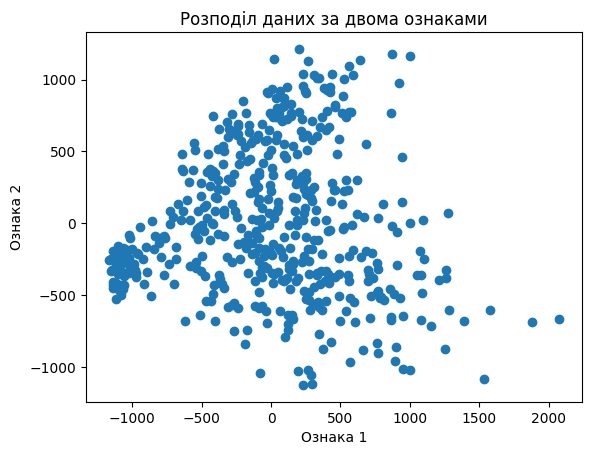

In [42]:
plt.scatter(mnist_2d.iloc[:,0 ], mnist_2d.iloc[:, 1])
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Розподіл даних за двома ознаками')
plt.show()

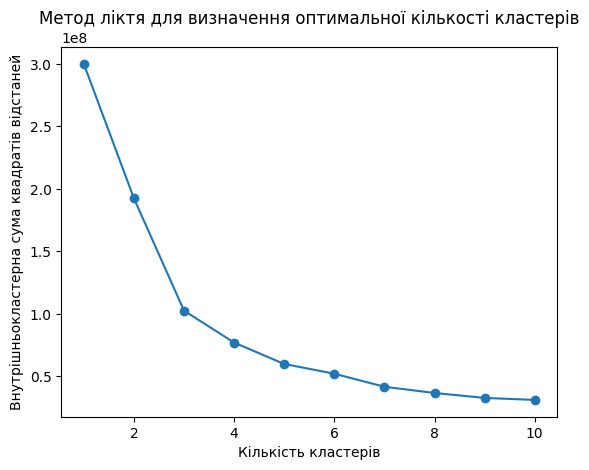

In [43]:
# Вибір діапазону кількості кластерів для перевірки
k_range = range(1, 11)
# Пустий список для збереження значень внутрішньокластерної суми квадратів відстаней
sse = []

# Перевірка для кожної кількості кластерів в діапазоні
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(mnist_2d)
    sse.append(kmeans.inertia_)

# Побудова графіку методу ліктя
plt.plot(k_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерна сума квадратів відстаней')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

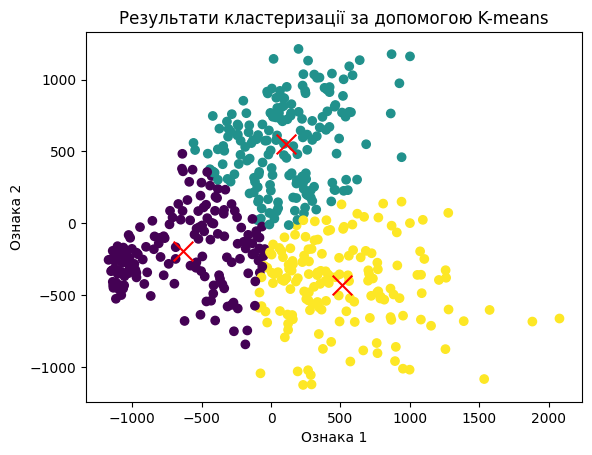

In [44]:
# Вибираємо оптимальну кількість кластерів 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k,n_init="auto")
kmeans.fit(mnist_2d)
labels = kmeans.labels_

# Визначаємо центри кластерів
centers = kmeans.cluster_centers_


plt.scatter(mnist_2d.iloc[:, 0], mnist_2d.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Результати кластеризації за допомогою K-means')
plt.show()